In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

In [13]:
image_pixels = io.imread("images/manyhearts1.jpg")
image_pixels.shape

(1200, 1200, 3)

In [14]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

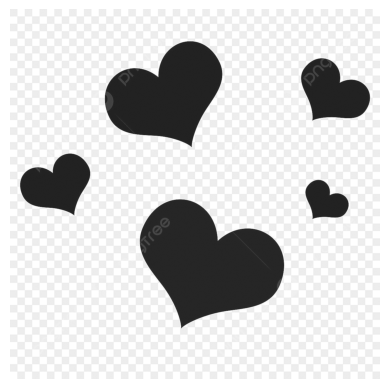

In [15]:
gray_img = color.rgb2gray(image_pixels)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [16]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(1200, 1200)

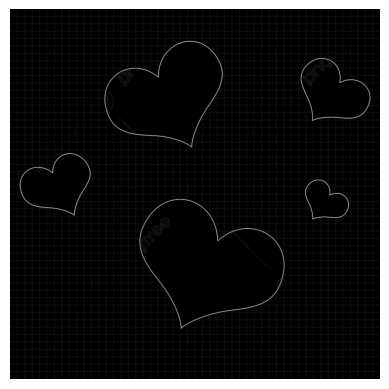

In [17]:
from skimage.util import img_as_ubyte

io.imsave("images/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [18]:
threshold = 0.2
edges = edge_sobel > threshold
edges[30:33,:30]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [19]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([ 104,  104,  104, ..., 1035, 1035, 1036], shape=(9760,)),
 array([572, 573, 574, ..., 555, 556, 555], shape=(9760,)))

In [20]:
edges[104,572]

np.True_

In [21]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[104, 572],
       [104, 573],
       [104, 574]])

In [22]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[448.5, 589. ],
        [448.5, 588. ],
        [448. , 587.5],
        ...,
        [447.5, 590. ],
        [448. , 589.5],
        [448.5, 589. ]], shape=(1511, 2)),
 array([[445. , 588.5],
        [444.5, 588. ],
        [444. , 587.5],
        ...,
        [445. , 587.5],
        [445.5, 588. ],
        [445. , 588.5]], shape=(1499, 2)),
 array([[362.5, 981. ],
        [362.5, 980. ],
        [362. , 979.5],
        ...,
        [361.5, 982. ],
        [362. , 981.5],
        [362.5, 981. ]], shape=(887, 2)),
 array([[359. , 982.5],
        [358.5, 983. ],
        [358.5, 984. ],
        ...,
        [359. , 981.5],
        [359.5, 982. ],
        [359. , 982.5]], shape=(873, 2)),
 array([[669.5, 209. ],
        [669.5, 208. ],
        [669.5, 207. ],
        ...,
        [668. , 209.5],
        [669. , 209.5],
        [669.5, 209. ]], shape=(897, 2)),
 array([[665. , 206.5],
        [664. , 206.5],
        [663. , 206.5],
        ...,
        [665.5, 205. ],
        [665.5